<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_6_2_himmelblau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion del problema de la funcion de Himmelblau

###Configuraciones y definiciones

In [1]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.4 MB/s eta 0:00:00


#Solucion del problema del agente de ventas viajero

###Configuraciones y definiciones

In [2]:
pip install deap

In [3]:
## Paso 1: Modulos

from deap import base
from deap import creator
from deap import tools

import random as rd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import elitism

In [4]:
# Constantes del problema:

DIMENSIONS = 2  # number of dimensions
BOUND_LOW, BOUND_UP = -5.0, 5.0  # boundaries for all dimensions

In [5]:
## Paso 2: Parametros del problema

# Contenido del problema del agente viajero

POPULATION_SIZE = 300     # Tamaño de la poblacion de individuos
P_CROSSOVER     =  0.9    # Probabilidad de cruza
P_MUTATION      =  0.5    # Probabilidad de mutación

MAX_GENERATIONS = 300     # Maximo numero de generaciones (condición de termino)

In [6]:
HALL_OF_FAME_SIZE = 30

In [7]:
CROWDING_FACTOR = 20.0  # Factor de aglomeracion para cruza y mutacion

In [8]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados

In [9]:
## Paso 4: Declarando el cromosoma
toolbox = base.Toolbox()

def randomFloat(low, up):
    return [rd.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)

In [10]:
toolbox.attrFloat()

[1.3942679845788373, -4.74989244777333]

In [11]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create('FitnessMin', base.Fitness, weights = (-1.0,))

In [12]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create("Individual", list, fitness=creator.FitnessMin)

In [13]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)

In [14]:
## Paso 8: Declarar el operador para generar la poblacion

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [15]:
## Paso 9: Definir función para calcular la aptitud
def himmelblau(individual):
    x = individual[0]
    y = individual[1]
    f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
    return f,  # return a tuple

In [16]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register("evaluate", himmelblau)

In [17]:
## Paso 11: Declarar los operadores geneticos

toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)

###Evolucionando la solución

In [18]:
def himmelblau_problem():


    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])

    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    plt.show()



gen	nevals	min     	avg    
0  	300   	0.077887	137.418
1  	258   	0.077887	79.024 
2  	258   	0.077887	46.3965
3  	259   	0.077887	29.1852
4  	257   	0.077887	24.6174
5  	263   	0.000321803	22.697 
6  	253   	0.000321803	20.185 
7  	257   	0.000321803	16.8825
8  	261   	0.000321803	17.2193
9  	264   	0.000321803	11.2078
10 	248   	0.000321803	11.373 
11 	257   	0.000321803	11.632 
12 	257   	0.000321803	9.3482 
13 	254   	6.79567e-05	12.5257
14 	262   	6.79567e-05	9.94383
15 	251   	6.79567e-05	9.89502
16 	254   	6.79567e-05	10.8606
17 	261   	6.79567e-05	8.65194
18 	264   	5.55738e-05	8.65389
19 	255   	4.22337e-05	9.59594
20 	247   	4.22337e-05	5.86419
21 	262   	3.19176e-06	7.62228
22 	264   	3.19176e-06	6.53664
23 	262   	3.19176e-06	6.74235
24 	257   	2.08199e-06	4.66071
25 	263   	2.08199e-06	6.55421
26 	261   	1.26015e-07	6.53739
27 	257   	1.26015e-07	3.77622
28 	264   	1.26015e-07	4.19847
29 	255   	1.26015e-07	5.90253
30 	252   	1.26015e-07	5.31571
31 	261   	1.21714e-07	5.2

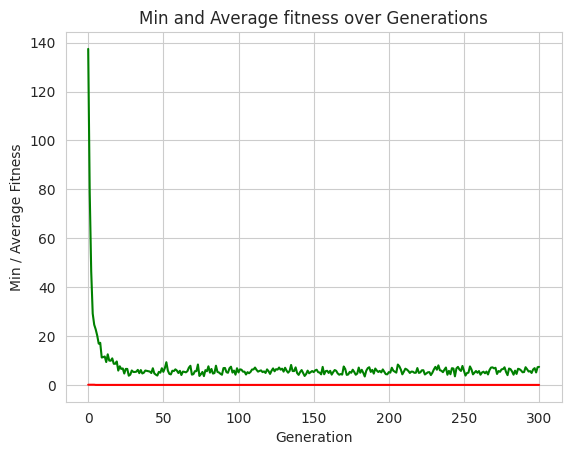

In [19]:
himmelblau_problem()